In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [14]:
# Sample data creation (replace this with your actual DataFrame)
df = pd.read_csv("EcmP_stock_L_2016_24_mix\AAPL_pct.csv")

scaler = StandardScaler()
dt = df['date'].copy()

df_n = df.drop(['date'],axis=1)

df_n = pd.DataFrame(scaler.fit_transform(df_n), columns=df_n.columns)





In [15]:
df_n[:10]

,open,high,low,close,volume,open_pct_change,high_pct_change,low_pct_change,close_pct_change
0,-1.155417,-1.159616,-1.164806,-1.168156,1.903146,1.601162,0.215589,0.169893,-1.422662
1,-1.176432,-1.173553,-1.175200,-1.176288,2.780071,-2.741299,-2.164439,-1.560291,-1.125330
2,-1.184045,-1.182523,-1.189276,-1.193482,3.654961,-1.085466,-1.465337,-2.139134,-2.351307
3,-1.184572,-1.186608,-1.187926,-1.191419,2.942117,-0.138380,-0.721751,0.134026,0.221026
4,-1.182871,-1.186808,-1.185553,-1.185067,1.484179,0.165678,-0.106132,0.288420,0.811647
5,-1.176473,-1.180281,-1.179415,-1.179281,1.443665,0.803475,0.972193,0.853660,0.720724
6,-1.177404,-1.178278,-1.185716,-1.189679,2.363445,-0.191239,0.241693,-1.006705,-1.457912
7,-1.186960,-1.181122,-1.192100,-1.181061,2.414019,-1.348657,-0.520173,-1.033860,1.119221
8,-1.194087,-1.192215,-1.193655,-1.190731,3.567694,-1.045748,-1.826881,-0.309672,-1.366116
9,-1.185138,-1.188450,-1.193082,-1.192632,1.715990,1.185427,0.537632,0.016723,-0.327459


In [70]:
def plot_series(df, input_window, target_window, target_column, titlefont_size=20, marker_list = ['*', 'o', 'D', 'x']):
    """
    Plots the input series and target series from the given dataframe.

    Parameters:
    df (pd.DataFrame): DataFrame containing the series data.
    input_window (int): Length of the input window.
    target_window (int): Length of the target window.
    target_column (str): The column name of the target series.
    """
    
    plt.figure(figsize=(15, 8))

    i = 0
    # Plot input series
    for col in df.columns:
        # if col != target_column:
        plt.plot(df[col].values[:input_window], linestyle='dotted',  marker=marker_list[i], label=f'Input Series: {col}')
        i+=1

    # Plot target series
    plt.plot(range(input_window, input_window + target_window), 
             df[target_column].values[input_window:input_window + target_window], 
             label=f'Target Series: {target_column}', linestyle='--', color='r', marker='x')

    plt.xlabel('Time Steps')
    plt.ylabel('Values (Z-Scores)')
    plt.title('Example Input Series and Target Series', fontsize=titlefont_size)
    plt.legend()
    plt.grid(True)
    plt.show()

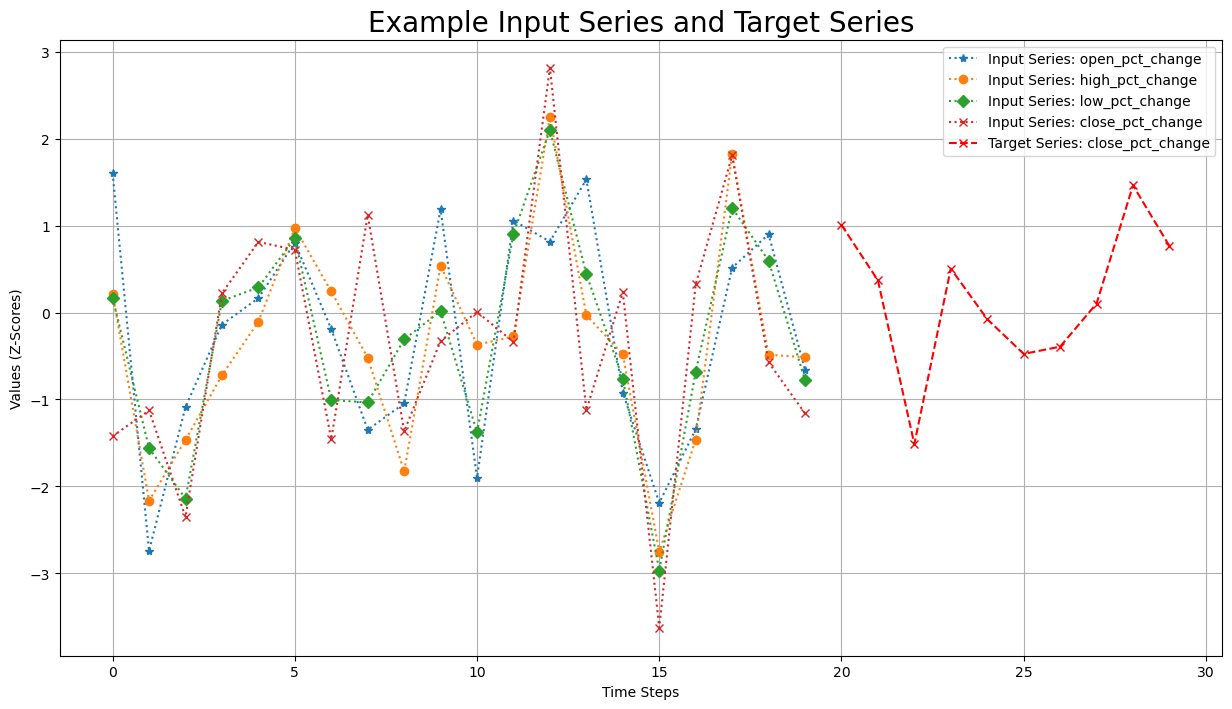

In [71]:
plot_series(df_n.iloc[:, 5:], 20, 10, 'close_pct_change', 20)